<a href="https://colab.research.google.com/github/RasonYudha4/AI-Subject/blob/main/self-teach/KMeans_TulipExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'], axis='columns', inplace=True)

In [7]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [9]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [11]:
df['cluster'] = yp
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [12]:
df.cluster.unique()

array([1, 0, 2], dtype=int32)

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

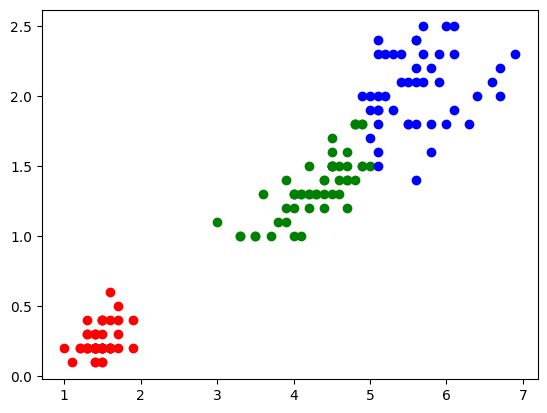

In [14]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='blue')

**Elbow Plot**

In [15]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

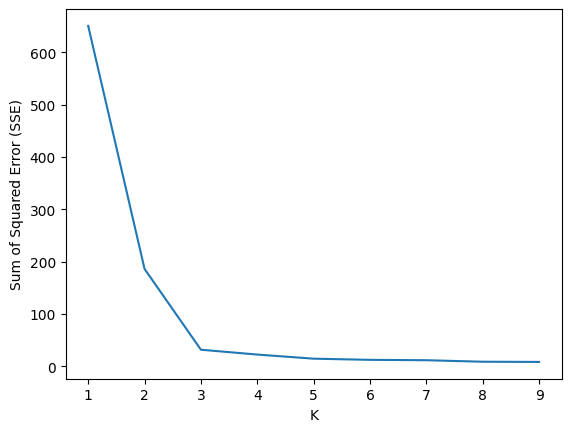

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error (SSE)')
plt.plot(k_rng, sse)